In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras, random
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow import random as rnd
seed_value = 1234578790
seed(seed_value)
rnd.set_seed(seed_value)

In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

170508288/170498071 [==============================] - 3s 0us/step


###**Step 0: Dataset Inspection**
Load the dataset and make a quick inspection.

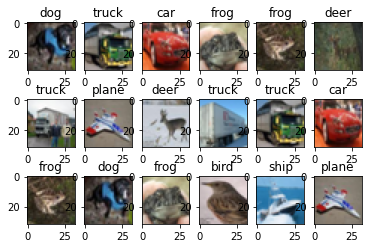

In [3]:
# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):    
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = np.random.randint(0, size)
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])

Compute the class histogram (you can visualize it if you want). Is the dataset balanced?

Hint: You might find [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) tool useful. In any case, it's up to you how you compute the histogram.

In [4]:
import pandas as pd
y_train_df = pd.DataFrame(y_train, columns=['y_train'])
print(type(y_train_df))

<class 'pandas.core.frame.DataFrame'>


Text(0, 0.5, 'Counts')

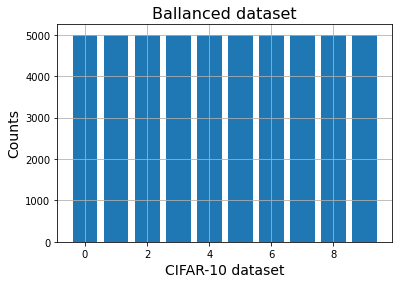

In [5]:
from collections import Counter
hist = Counter(y_train_df['y_train'])

plt.title("Ballanced dataset", fontsize=16 )
plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('CIFAR-10 dataset', fontsize=14),
plt.ylabel('Counts', fontsize=14)

**Dataset is balanced**

###**Step 1: Data Preparation**
In this step, you'll need to prepare the data for training, i.e., you will have to normalize it and encode the labels as one-hot vectors.

In [6]:
# Normalization
x_train = x_train / 255
x_test = x_test / 255

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


### **Step 2: Building the Classifier**
Build the CNN for CIFAR10 classification. For starters, you can use the same network we used in the lesson for the MNIST problem.

In [7]:
# Build the classifier
inputs = Input(shape=(size, size, 3))

net = Conv2D(16, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(32, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)
# Show the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0     

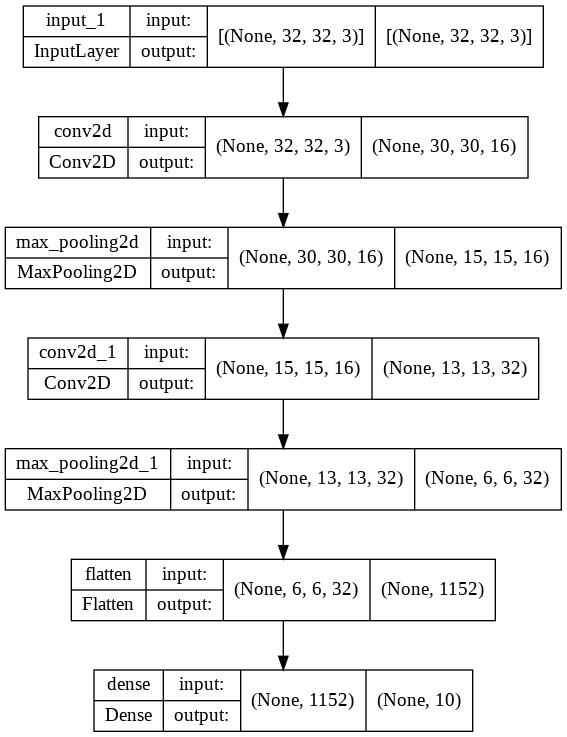

In [8]:
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

### **Step 3: Training**
Compile the model and train it.

In [9]:
epochs = 25
batch_size = 128

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
start = time()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
print('Elapsed time', time() - start)

Epoch 1/25
352/352 [==============================] - 37s 99ms/step - loss: 1.7593 - accuracy: 0.3750 - val_loss: 1.5619 - val_accuracy: 0.4526
Epoch 2/25
352/352 [==============================] - 28s 80ms/step - loss: 1.4340 - accuracy: 0.4966 - val_loss: 1.3554 - val_accuracy: 0.5216
Epoch 3/25
352/352 [==============================] - 28s 81ms/step - loss: 1.3374 - accuracy: 0.5321 - val_loss: 1.3053 - val_accuracy: 0.5452
Epoch 4/25
352/352 [==============================] - 29s 82ms/step - loss: 1.2772 - accuracy: 0.5497 - val_loss: 1.2383 - val_accuracy: 0.5720
Epoch 5/25
352/352 [==============================] - 30s 84ms/step - loss: 1.2298 - accuracy: 0.5722 - val_loss: 1.2120 - val_accuracy: 0.5828
Epoch 6/25
352/352 [==============================] - 28s 81ms/step - loss: 1.1862 - accuracy: 0.5866 - val_loss: 1.1567 - val_accuracy: 0.6038
Epoch 7/25
352/352 [==============================] - 28s 81ms/step - loss: 1.1521 - accuracy: 0.5996 - val_loss: 1.1528 - val_accuracy:

Train Acc      0.6985111236572266
Validation Acc 0.6600000262260437


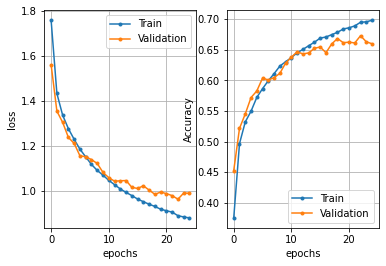

In [11]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1]) 

### **Step 4: Evaluation**
In this step, you have to calculate the accuracies and visualize some random samples. For the evaluation, you are going to use the test split from the dataset.

In [12]:
# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)

In [13]:
# Overall accuracy
y_pred_idxes = y_pred.argmax(axis=1)
overall_acc = np.sum(y_pred_idxes==y_true) / len(y_true)
print(f'overall accuracy is: {overall_acc*100:.2f}%')

overall accuracy is: 65.03%


In [14]:
# Compute and print the accuracy for each class
for class_id, class_name in classes.items():
    acc = len(y_pred_idxes[y_pred_idxes==class_id]) / len(y_true[y_true==class_id])
    print(f'{class_name:<8} {acc:<5}')

plane    1.024
car      1.042
bird     1.47 
cat      1.039
deer     0.624
dog      0.95 
frog     0.82 
horse    1.175
ship     0.847
truck    1.009


In [15]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 [==============================] - 3s 9ms/step - loss: 1.0105 - accuracy: 0.6503
Test loss   1.010523796081543
Test metric 0.6503000259399414


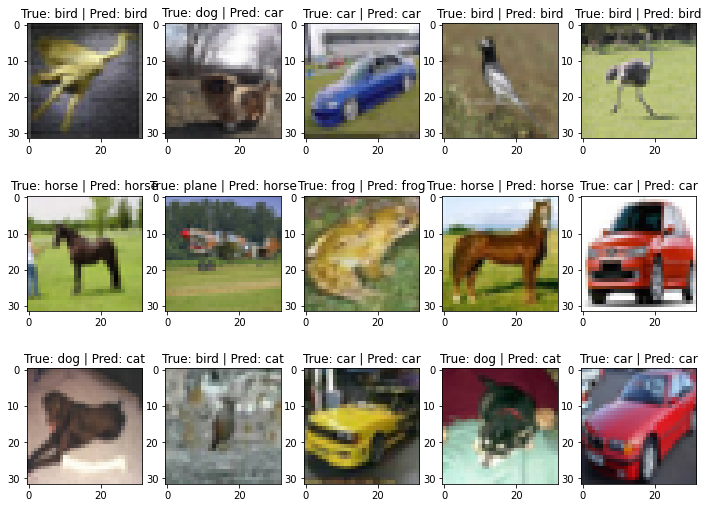

In [16]:
limit = x_test.shape[0]
plt.rcParams['figure.figsize'] = [12, 9]
# Show random samples
for ii in range(15):
    # Pick a random sample
    idx = np.random.randint(0, limit)
    # Show the results
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred_idxes[idx]]))

### **Questions**
* What is the overall accuracy of the classifier?
* What modifications would you do in order to improve the classification accuracy?
* Make one modification (that you think can help) and train the classifier again. Does the accuracy improve?

### **Answers**
* Overall accuracy of the classifier is 65.03% (_test data set_)
* It seems meaningfull to change number of epochs, when it is slightly more than 20, model shows its optima.
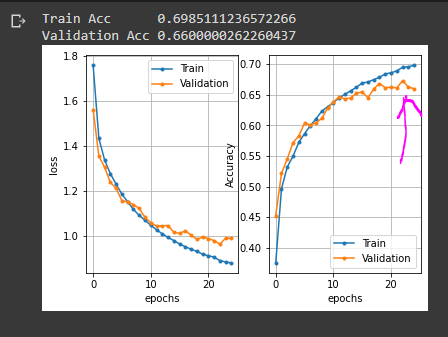
* its seems a good idea to change number of neurons in CNN, so, I have changed this parametra from 32 to 64:

In [17]:
# Build the classifier
inputs = Input(shape=(size, size, 3))

net = Conv2D(64, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(32, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)
# Show the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0   

In [18]:
epochs = 25
batch_size = 128
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
start = time()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
print('Elapsed time', time() - start)

Epoch 1/25
352/352 [==============================] - 69s 194ms/step - loss: 1.6765 - accuracy: 0.3996 - val_loss: 1.5106 - val_accuracy: 0.4778
Epoch 2/25
352/352 [==============================] - 67s 190ms/step - loss: 1.3712 - accuracy: 0.5165 - val_loss: 1.3278 - val_accuracy: 0.5340
Epoch 3/25
352/352 [==============================] - 67s 190ms/step - loss: 1.2616 - accuracy: 0.5587 - val_loss: 1.2150 - val_accuracy: 0.5710
Epoch 4/25
352/352 [==============================] - 67s 190ms/step - loss: 1.1718 - accuracy: 0.5926 - val_loss: 1.1208 - val_accuracy: 0.6056
Epoch 5/25
352/352 [==============================] - 67s 191ms/step - loss: 1.1108 - accuracy: 0.6174 - val_loss: 1.0946 - val_accuracy: 0.6226
Epoch 6/25
352/352 [==============================] - 67s 191ms/step - loss: 1.0608 - accuracy: 0.6351 - val_loss: 1.0481 - val_accuracy: 0.6308
Epoch 7/25
352/352 [==============================] - 67s 191ms/step - loss: 1.0227 - accuracy: 0.6488 - val_loss: 1.0376 - val_ac

Train Acc      0.7364888787269592
Validation Acc 0.6801999807357788


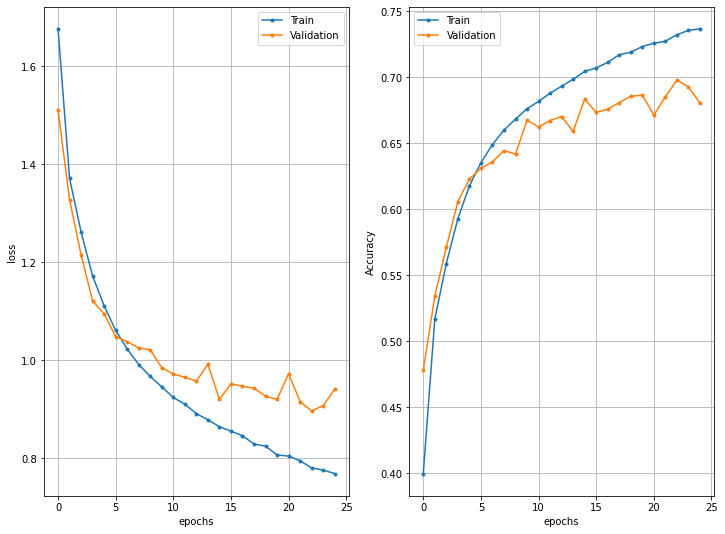

In [19]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1]) 

Result is 68%, it is better then previous - 66%.
Potentially, we can get approx. 70% accuracy, when number of epochs will be changed. Anyway 70% is worse result as with Train data set - 73%.
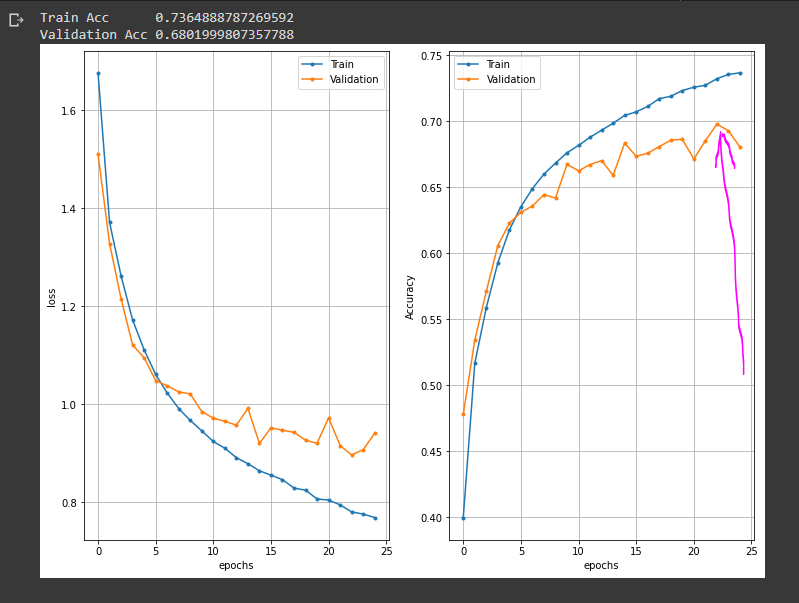